In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
import os
from decimal import Decimal
import glob
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['axes.unicode_minus'] = False
import platform
from matplotlib import font_manager, rc
font = 'Arial'
plt.rcParams['font.family'] = font
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data= pd.read_csv('total_data.csv')
start_year=2009
end_year=2018
TT_year=2016

In [3]:
data=data[(data['Year']>=start_year) & (data['Year']<=end_year)]
data.index=range(len(data))
df=data

# Data 

In [4]:
df

,level_0,Time,Year,Week,Month,Rate,Average temperature,Minimum temperature,Maximum temperature,Rainfall,...,Number of Daycare center,Population of Daycare center,outbreak,warning,peak,warning3,warning2,season,Last norovirus detection late,th
0,24,213,2009,1,1,0.254237,-2.836937,-8.133784,3.728829,0.070614,...,35550,1175049,1,1,0,1,1,3.0,0.264706,0.1
1,25,214,2009,2,1,0.242718,-1.442446,-6.129679,4.415236,0.063534,...,35550,1175049,1,1,0,1,1,3.0,0.254237,0.1
2,26,215,2009,3,1,0.209091,-3.629965,-8.651128,1.834398,0.220865,...,35550,1175049,1,1,0,1,1,3.0,0.242718,0.1
3,27,216,2009,4,1,0.203125,0.010902,-4.788534,5.876504,0.796053,...,35550,1175049,1,1,0,1,1,3.0,0.209091,0.1
4,28,217,2009,5,1,0.134752,0.651298,-4.672556,6.612406,0.759211,...,35550,1175049,1,1,0,1,1,3.0,0.203125,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,19,738,2018,49,12,0.058824,4.359091,0.242857,8.800974,3.480844,...,39171,1415742,0,1,0,0,0,13.0,0.174603,0.1
526,20,739,2018,50,12,0.175439,-1.687662,-6.483279,3.757305,0.297078,...,39171,1415742,1,1,0,1,1,13.0,0.058824,0.1
527,21,740,2018,51,12,0.258065,3.774838,-1.359740,9.749026,0.129383,...,39171,1415742,1,1,0,1,1,13.0,0.175439,0.1
528,22,741,2018,52,12,0.189189,-1.307630,-5.658279,3.435390,0.226136,...,39171,1415742,1,1,0,1,1,13.0,0.258065,0.1


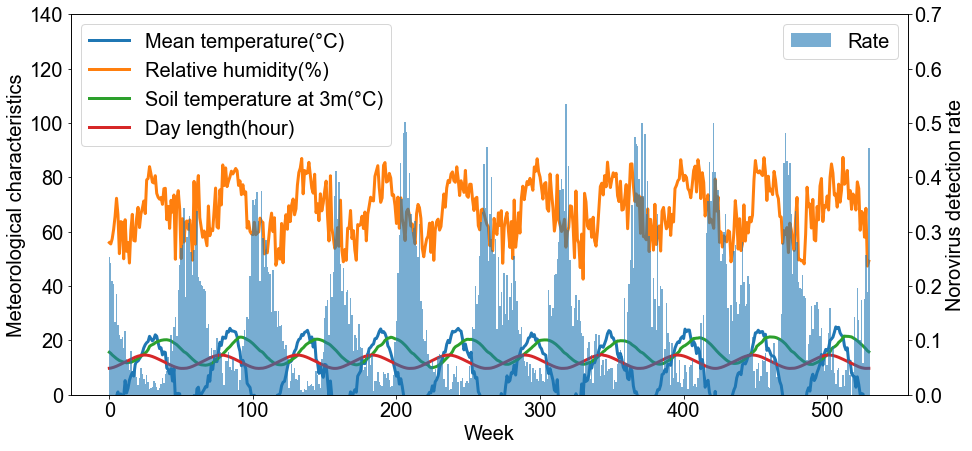

In [17]:
# plt.figure(figsize=(20,10))
fig, ax1=plt.subplots(figsize=(15,7))
plt.rc('font', size=20)        # 기본 폰트 크기
plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=20)  # 범례 폰트 크기
plt.rc('figure', titlesize=20) # figure title 폰트 크기
plt.xlabel('Week',size=20)
# plt.ylabel('score value',size=20)
plt.plot(df['Minimum temperature'],label='Mean temperature(°C)',linewidth=3)
plt.plot(df['Relative humidity'],label='Relative humidity(%)',linewidth=3)
plt.plot(df['Soil temperature at 3m'],label='Soil temperature at 3m(°C)',linewidth=3)
plt.plot(df['Day length'],label='Day length(hour)',linewidth=3)
plt.ylabel('Meteorological characteristics')
plt.legend(prop={'size':20},loc='upper left')
plt.ylim([0,140])
# plt.grid(True)

ax2=ax1.twinx()
ax2.set_ylim(0,0.7)
ax2.bar(df.index,df['Rate'],alpha=0.6,width=1,label='Rate')
ax2.legend()
ax2.set_ylabel('Norovirus detection rate')
# ax2.legend('Weekly norovirus detection rate')

plt.savefig('Fig2.tiff',dpi=300,facecolor='white', transparent = True,bbox_inches='tight')

# Histogram

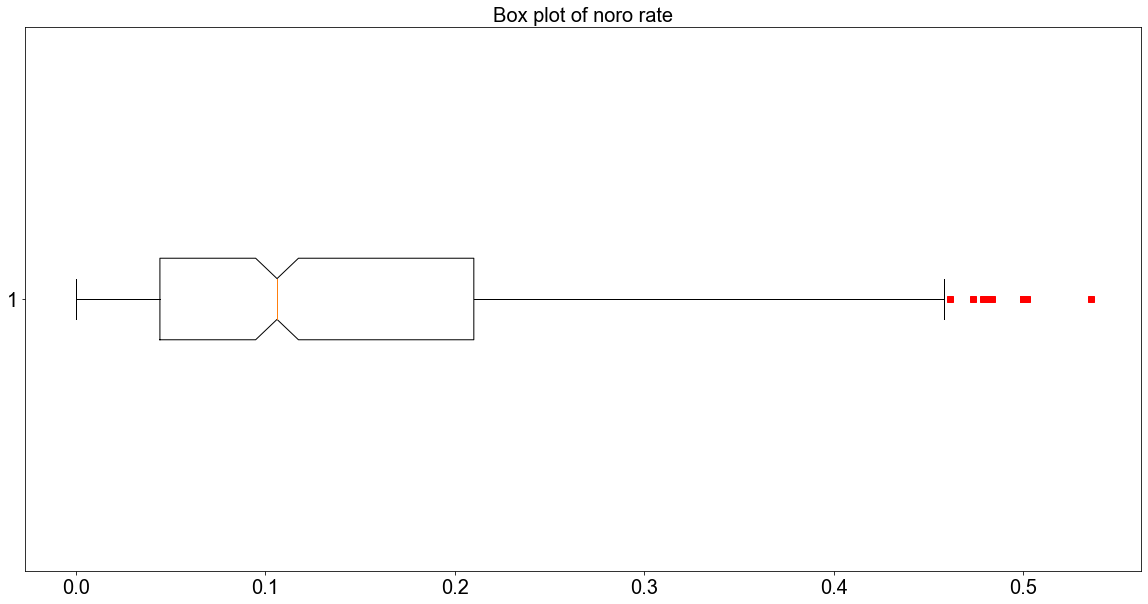

In [14]:
plt.figure(figsize=(20,10))
plt.xticks(fontsize=20)
plt.boxplot(rate,notch=1,sym='rs',vert=0)
plt.title('Box plot of noro rate',fontsize=20)
plt.savefig('box_plot.png')
# plt.yticks(['Noro rate'])
# plt.savefig('box_plot.png')

In [15]:
d=rate
quant=np.percentile(d,[1,25,50,75,99])
print(quant[1],quant[2],quant[3],quant[4])

0.044282265 0.10612952149999999 0.2100342465 0.48091812873


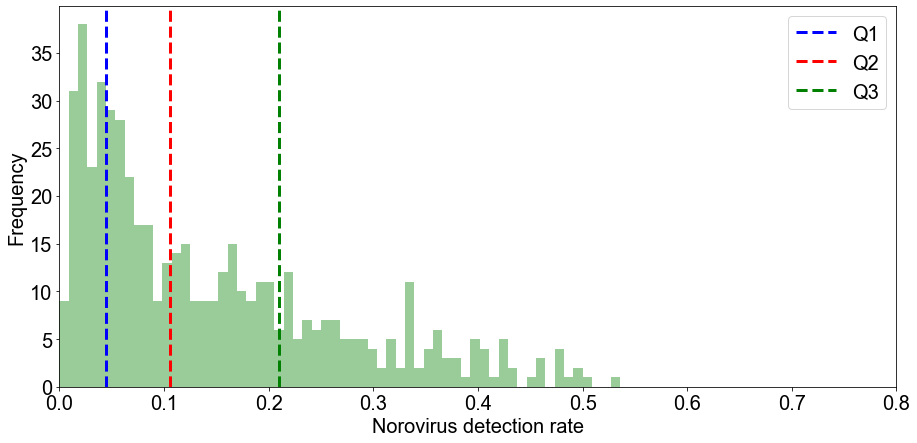

In [16]:
plt.figure(figsize=(15,7))
plt.rc('font', size=20)        # 기본 폰트 크기
plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=20)  # 범례 폰트 크기
plt.rc('figure', titlesize=20) # figure title 폰트 크기
# plt.xlabel('Rate of Norovirus',size=20)
plt.ylabel('score value',size=20)
# plt.hist(rate,bins=80,histtype='barstacked',color='orange',density=True)

sns.distplot(rate,bins=60,color='g',hist=True,kde=False)
plt.axvline(x=quant[1],color='b',linestyle='--',linewidth=3,label='Q1')
plt.axvline(x=quant[2],color='r',linestyle='--',linewidth=3,label='Q2')
plt.axvline(x=quant[3],color='g',linestyle='--',linewidth=3,label='Q3')
plt.xlim([0,0.8])
plt.ylabel('Frequency')
plt.xlabel('Norovirus detection rate')

plt.legend(prop={'size':20})
# plt.show()

plt.savefig('S1.tiff',facecolor='white', dpi=300,transparent = True,bbox_inches='tight')